# Исследование объявлений о продаже квартир
В этом исследовании изучим ахрив с данными о продаже квартир. Обработаем дынные, исследуем их, построим графики, проанализируем и попытаемся найти интересные закономерности.


### Импорт библиотек, знакомство с датафреймом

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


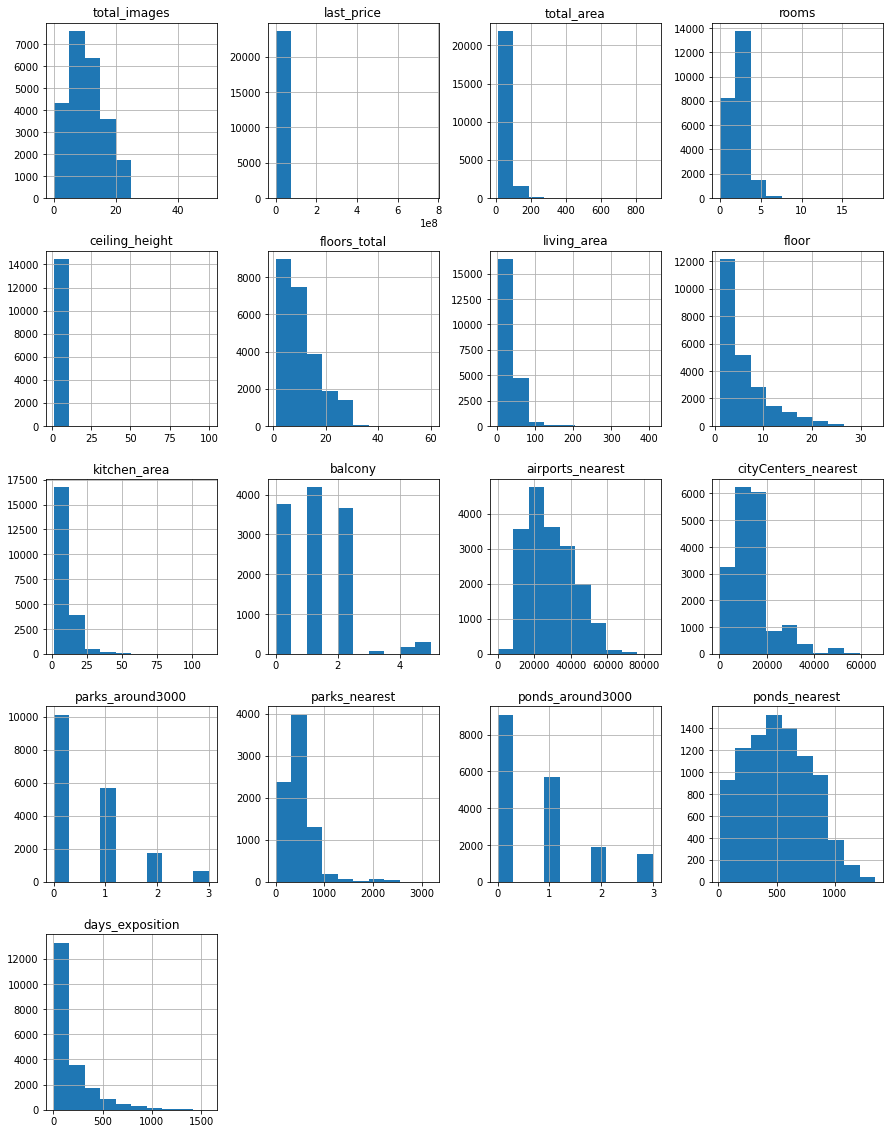

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#data.info()
#display(data.head(20))
data.hist(figsize=(15, 20))

display(data.info())
display(data.head())


## Предобработка данных

Импортируем библиотеки
Читаем файл, понимаем, что надо добавить разделитель столбцов "\t".
Выводим общую информацию о датафрейме и первые 20 строк
Строим гистограммы для всех столбцов с числовым типом данных

In [3]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

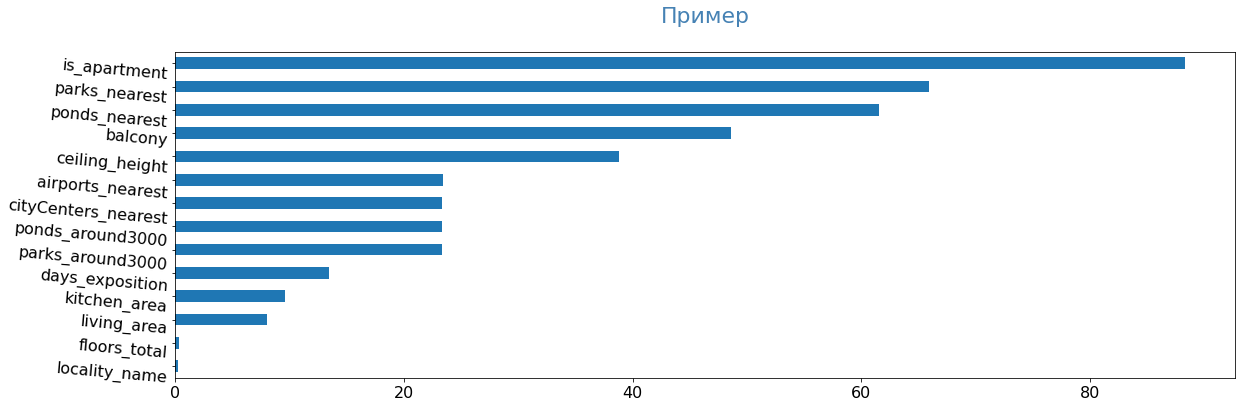

In [4]:
pass_value_barh(data)

###  Обработка пропусков:

In [5]:
#print(data.isna().sum()) # смотрим где и сколько прорусков

data['is_apartment'] = data['is_apartment'].fillna(0) # пропуски значения меняем на 0, пердполагая, что это не аппартаменты
data['balcony'] = data['balcony'].fillna(0) #пропуски значения меняем на 0, пердполагая, что балконов нет
data['locality_name'] = data['locality_name'].fillna('неизвестное') # меняем на 'неизвестное', т.к. для восстановления нет данных
display(data.isna().sum())



total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

0

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

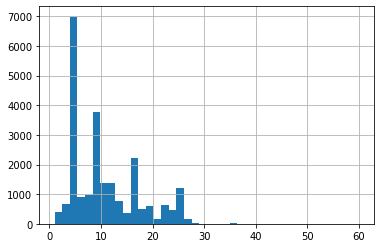

In [6]:
display(data['floors_total'].describe())
data['floors_total'].hist(bins=40)
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
display(data['floors_total'].isna().sum())
display(data['floors_total'].describe())
#data['floors_total'].hist(bins=40)
#гистограммы и средние значения не изменились.

<div class="alert alert-info">
<b>Пропущенные значения в столбцах ceiling_height, living_area не трогаем, т.к. их замена медианными или средними данными не улучшит качество данных, но может исказить их в сторону более среднего или медианного значения. 
print(data.isna().sum()) # смотрим где и сколько прорусков.
is_apartment - пропуски значения меняем на 0, пердполагая, что это не аппартаменты.
balcony -пропуски значения меняем на 0, пердполагая, что балконов нет.
locality_name меняем на 'неизвестное', т.к. для восстановления нет данных.
days_exposition пропуски считаем за непроданные квартиры.
Пропуски в геолокационных данных не трогаем по упомянутой в первом случае причине</b> 
</div>

<div class="alert alert-info">
<b>Пропущенные значения в столбцах floors_total ввиду небольшого количества можно заменить на медианное значение,
проконтролировав гистограммой и describe()</b> 
</div>

### Изменение типов данных:

In [7]:
display(data.info())
data['last_price'] = pd.to_numeric(data['last_price'], errors='ignore')  # меняем тип данных на целочиленный
data['days_exposition'] = data['days_exposition'].astype('int', errors='ignore') # меняем тип данных на целочиленный
data['is_apartment'] = pd.to_numeric(data['is_apartment'], errors='ignore')  # меняем тип данных на целочиленный
data['floors_total'] = data['floors_total'].astype('int', errors='ignore') # меняем тип данных на целочиленный
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d') # меняем на формат дата
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  int64         
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

None

### Обработка неявных дубликатов

In [8]:

data['locality_name'] = data['locality_name'].str.replace('ё', 'е') # чтобы снизить кол-во дубликатов заменяем все значения 'ё' 

data['locality_name'] = (
    data['locality_name']
    .replace('поселок|деревня|городского типа |коттеджный|городской|село|пок', '', regex=True)
)
data['locality_name'] = data['locality_name'].str.lstrip() 

print(data['locality_name'].value_counts().head(60)) # проверяем
#print(data.info())


Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Петергоф             201
Сестрорецк           183
Красное Село         178
Новое Девяткино      144
Сертолово            142
Ломоносов            133
Кириши               125
Бугры                114
Сланцы               112
Волхов               111
Тосно                104
Кингисепп            104
Кронштадт             96
Никольское            94
Коммунар              89
Сосновый Бор          87
Кировск               84
Отрадное              80
Янино-1               68
Металлострой          66
Приозерск             66
Старая                64
Шлиссельбург          57
Луга                  56
неизвестное           49
Тихвин                49
Стрельна              44
Тельмана              41
Рощино                39
Павловск              38


# Удаление аномальных значений

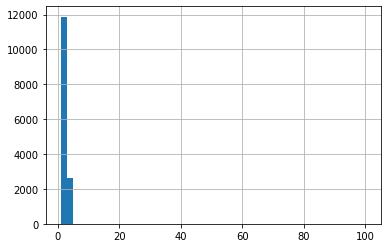

In [9]:
#print(data['ceiling_height'].sort_values(ascending=False)) # выявляем аномально большие значения высоты потолков 
data.loc[(data['ceiling_height']>20)&(data['ceiling_height']<40), 'ceiling_height'] /= 10
data['ceiling_height'].hist(bins=50) # потолки с высотой больше 4м и меньше 2- редкость, можно убрать
data = data.query('(ceiling_height>2)&(ceiling_height<4)|(ceiling_height.isna())')

<AxesSubplot:>

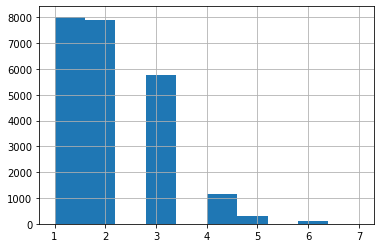

In [10]:
#data['rooms'].hist(bins=10) #7 комнатные квартиры- редкость, можно отфильтовать
data = data.query('rooms<7')
data['rooms'].hist(bins=10, range=(1,7))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23505.000000,2.350500e+04,23505.000000,23505.000000,14335.000000,23505.000000,21619.000000,23505.000000,23505.000000,21251.000000,23505.000000,17986.000000,18006.000000,18007.000000,7956.000000,18007.000000,8992.000000,20378.000000
mean,9.846075,6.304818e+06,59.287856,2.044756,2.715442,10.704786,33.775690,5.905127,0.001872,10.492537,0.592980,28828.080229,14264.796957,0.605542,491.410131,0.765202,518.903692,180.210914
std,5.668572,8.501188e+06,31.305938,1.003417,0.245686,6.588917,19.403187,4.893046,0.043226,5.691369,0.959773,12664.891942,8589.156567,0.797195,343.566760,0.934881,277.849572,219.049876
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,0.000000,7.000000,0.000000,18539.000000,9399.000000,0.000000,287.750000,0.000000,295.000000,45.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,0.000000,9.100000,0.000000,26815.000000,13146.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.800000,16.000000,42.000000,8.000000,0.000000,12.000000,1.000000,37350.250000,16319.000000,1.000000,613.000000,1.000000,731.000000,230.000000
max,50.000000,4.013000e+08,500.000000,6.000000,3.980000,60.000000,300.000000,33.000000,1.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23366.000000,2.336600e+04,23366.000000,23366.000000,14243.000000,23366.000000,21492.000000,23366.000000,23366.000000,21112.000000,23366.000000,17851.000000,17871.000000,17872.000000,7880.000000,17872.000000,8911.000000,20277.000000
mean,9.826243,6.126384e+06,58.659255,2.037704,2.713133,10.715570,33.529347,5.905718,0.001797,10.238277,0.593298,28812.733012,14299.650999,0.603458,491.764975,0.762142,520.062283,179.665730
std,5.659602,7.443806e+06,29.610522,0.998432,0.243728,6.592591,18.720717,4.893531,0.042360,4.658700,0.959173,12687.670607,8588.652875,0.795766,342.555180,0.932141,277.664138,218.416195
min,0.000000,4.300000e+05,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.600000,2.000000,0.000000,7.000000,0.000000,18498.000000,9444.000000,0.000000,288.000000,0.000000,297.000000,45.000000
50%,9.000000,4.600000e+06,51.700000,2.000000,2.650000,9.000000,30.000000,4.000000,0.000000,9.000000,0.000000,26791.000000,13164.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.650000e+06,68.600000,3.000000,2.800000,16.000000,42.000000,8.000000,0.000000,11.900000,1.000000,37364.000000,16360.000000,1.000000,613.000000,1.000000,733.000000,229.000000
max,50.000000,4.013000e+08,500.000000,6.000000,3.980000,60.000000,250.000000,33.000000,1.000000,39.900000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


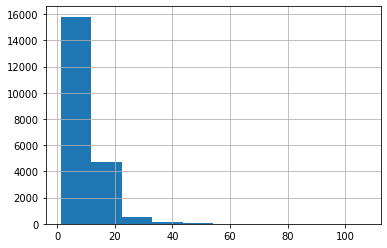

In [11]:
display(data.describe())
data['kitchen_area'].hist() # на гистограмме видно, что квартиры с кухнями больше 40кв.м. встречаются редко
data = data.query('(kitchen_area<40)|(kitchen_area.isna())') # удаляем
#display(data.info())
display(data.describe())

#print ('до I удаления', data.shape[0])
#data = data.query('kitchen_area<30)')
#print ('после II удаления', data.shape[0])
#display(data.isna().sum())
#data.describe()
#data['days_exposition'].hist(bins=100)
#data.boxplot(figsize=(20, 10))
#plt.show()

#display(data.info())

count    23245.000000
mean        57.632121
std         25.690218
min         12.000000
25%         40.000000
50%         51.360000
75%         68.000000
max        199.200000
Name: total_area, dtype: float64

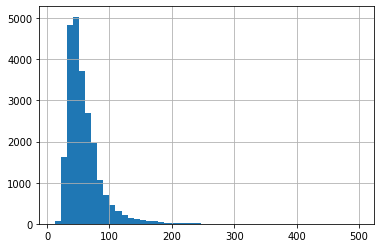

In [12]:
data['total_area'].hist(bins=50) # на гистограмме видно, что квартиры с обшей площадью меньше 200 встречаются крайне редке
data = data.query('total_area < 200') # отфильтровываем срезом
data['total_area'].describe()


#### check r.2.1

In [13]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23245 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23245 non-null  int64         
 1   last_price            23245 non-null  float64       
 2   total_area            23245 non-null  float64       
 3   first_day_exposition  23245 non-null  datetime64[ns]
 4   rooms                 23245 non-null  int64         
 5   ceiling_height        14172 non-null  float64       
 6   floors_total          23245 non-null  int64         
 7   living_area           21390 non-null  float64       
 8   floor                 23245 non-null  int64         
 9   is_apartment          23245 non-null  int64         
 10  studio                23245 non-null  bool          
 11  open_plan             23245 non-null  bool          
 12  kitchen_area          21009 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23202.000000,2.320200e+04,23202.000000,23202.000000,14146.000000,23202.000000,21353.000000,23202.000000,23202.000000,20972.000000,23202.000000,17689.000000,17709.000000,17710.000000,7763.000000,17710.000000,8784.000000,20152.000000
mean,9.808982,5.758134e+06,57.456661,2.020860,2.709709,10.741143,32.921534,5.911732,0.001810,10.153746,0.594733,28831.245350,14370.061438,0.595991,493.104341,0.754941,522.042350,178.893509
std,5.649052,4.379965e+06,25.365357,0.976644,0.239597,6.601769,16.865364,4.902248,0.042509,4.517247,0.959915,12726.596674,8576.633691,0.788216,343.184505,0.927140,277.460395,217.622879
min,0.000000,4.300000e+05,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.500000,2.000000,0.000000,7.000000,0.000000,18459.000000,9585.000000,0.000000,288.000000,0.000000,302.000000,45.000000
50%,9.000000,4.600000e+06,51.250000,2.000000,2.650000,9.000000,30.000000,4.000000,0.000000,9.000000,0.000000,26842.000000,13219.000000,0.000000,456.000000,0.000000,506.000000,94.000000
75%,14.000000,6.599000e+06,68.000000,3.000000,2.800000,16.000000,42.000000,8.000000,0.000000,11.780000,1.000000,37407.000000,16407.000000,1.000000,614.000000,1.000000,733.000000,228.000000
max,50.000000,4.990000e+07,199.200000,6.000000,3.980000,60.000000,164.700000,33.000000,1.000000,39.900000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


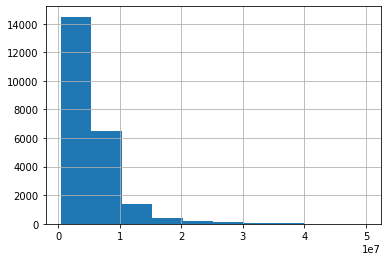

In [14]:
#data['last_price'].hist(bins=10)# ничего не понятно - попробуем сузить значения
data.query('last_price < 50_000_000')['last_price'].hist(bins=10)#отфильтруем срезом цену меньше 50000000, тут видно, что
#квартиры дороже 40млн. встречаются редко и их можно убрать.
# data['last_price'] = data.query('last_price < 50000000')
data = data[data['last_price']<50_000_000]
data.describe()

In [15]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23202 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23202 non-null  int64         
 1   last_price            23202 non-null  float64       
 2   total_area            23202 non-null  float64       
 3   first_day_exposition  23202 non-null  datetime64[ns]
 4   rooms                 23202 non-null  int64         
 5   ceiling_height        14146 non-null  float64       
 6   floors_total          23202 non-null  int64         
 7   living_area           21353 non-null  float64       
 8   floor                 23202 non-null  int64         
 9   is_apartment          23202 non-null  int64         
 10  studio                23202 non-null  bool          
 11  open_plan             23202 non-null  bool          
 12  kitchen_area          20972 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23202.000000,2.320200e+04,23202.000000,23202.000000,14146.000000,23202.000000,21353.000000,23202.000000,23202.000000,20972.000000,23202.000000,17689.000000,17709.000000,17710.000000,7763.000000,17710.000000,8784.000000,20152.000000
mean,9.808982,5.758134e+06,57.456661,2.020860,2.709709,10.741143,32.921534,5.911732,0.001810,10.153746,0.594733,28831.245350,14370.061438,0.595991,493.104341,0.754941,522.042350,178.893509
std,5.649052,4.379965e+06,25.365357,0.976644,0.239597,6.601769,16.865364,4.902248,0.042509,4.517247,0.959915,12726.596674,8576.633691,0.788216,343.184505,0.927140,277.460395,217.622879
min,0.000000,4.300000e+05,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.500000,2.000000,0.000000,7.000000,0.000000,18459.000000,9585.000000,0.000000,288.000000,0.000000,302.000000,45.000000
50%,9.000000,4.600000e+06,51.250000,2.000000,2.650000,9.000000,30.000000,4.000000,0.000000,9.000000,0.000000,26842.000000,13219.000000,0.000000,456.000000,0.000000,506.000000,94.000000
75%,14.000000,6.599000e+06,68.000000,3.000000,2.800000,16.000000,42.000000,8.000000,0.000000,11.780000,1.000000,37407.000000,16407.000000,1.000000,614.000000,1.000000,733.000000,228.000000
max,50.000000,4.990000e+07,199.200000,6.000000,3.980000,60.000000,164.700000,33.000000,1.000000,39.900000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


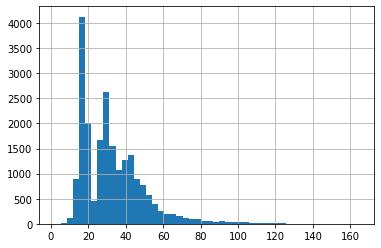

In [16]:
data['living_area'].hist(bins=50)# рекдки значения больше 110кв.м.
data = data.query('(living_area < 110000)|(living_area.isna())')
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23171.000000,2.317100e+04,23171.000000,23171.000000,14133.000000,23171.000000,21323.000000,23171.000000,23171.000000,20944.000000,23171.000000,17658.000000,17678.000000,17679.000000,7759.000000,17679.000000,8754.000000,20128.000000
mean,9.805101,5.756875e+06,57.452189,2.021190,2.709707,10.706875,32.925147,5.895818,0.001813,10.146632,0.594320,28846.097236,14358.201154,0.596753,493.055291,0.751174,523.482294,178.906797
std,5.648974,4.382062e+06,25.371059,0.976827,0.239692,6.536466,16.871358,4.873738,0.042537,4.512327,0.959531,12727.650648,8576.551871,0.788474,343.246746,0.923307,276.783384,217.681932
min,0.000000,4.300000e+05,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.500000,2.000000,0.000000,7.000000,0.000000,18449.000000,9567.000000,0.000000,288.000000,0.000000,303.000000,45.000000
50%,9.000000,4.600000e+06,51.200000,2.000000,2.650000,9.000000,30.000000,4.000000,0.000000,9.000000,0.000000,26885.500000,13205.000000,0.000000,456.000000,0.000000,507.000000,94.000000
75%,14.000000,6.592610e+06,68.000000,3.000000,2.800000,16.000000,42.000000,8.000000,0.000000,11.700000,1.000000,37407.000000,16376.000000,1.000000,614.000000,1.000000,733.000000,228.000000
max,50.000000,4.990000e+07,199.200000,6.000000,3.980000,29.000000,164.700000,27.000000,1.000000,39.900000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


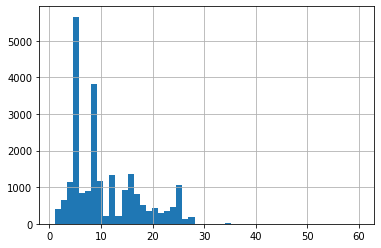

In [17]:
data['floors_total'].hist(bins=50) # на гистограмме видно, что количество домов выше 30 крайне мало
data = data.query('(floors_total < 30)|(floors_total.isna())')
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23166.000000,2.316600e+04,23166.000000,23166.000000,14130.000000,23166.000000,21318.000000,23166.000000,23166.000000,20939.000000,23166.000000,17654.000000,17674.000000,17675.000000,7756.000000,17675.000000,8752.000000,20123.000000
mean,9.806009,5.755239e+06,57.449628,2.021195,2.709691,10.707416,32.923904,5.896055,0.001770,10.145616,0.594276,28847.078056,14358.119158,0.596662,493.099536,0.751004,523.510398,178.567112
std,5.648867,4.377925e+06,25.371445,0.976888,0.239696,6.536728,16.871815,4.874039,0.042033,4.511862,0.959477,12728.243894,8575.967625,0.788468,343.291384,0.923067,276.797045,216.639042
min,0.000000,4.300000e+05,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.500000,2.000000,0.000000,7.000000,0.000000,18449.000000,9567.000000,0.000000,288.000000,0.000000,303.000000,45.000000
50%,9.000000,4.600000e+06,51.200000,2.000000,2.650000,9.000000,30.000000,4.000000,0.000000,9.000000,0.000000,26888.000000,13205.000000,0.000000,456.000000,0.000000,507.000000,94.000000
75%,14.000000,6.590000e+06,68.000000,3.000000,2.800000,16.000000,42.000000,8.000000,0.000000,11.700000,1.000000,37407.000000,16373.500000,1.000000,614.000000,1.000000,733.000000,228.000000
max,50.000000,4.990000e+07,199.200000,6.000000,3.980000,29.000000,164.700000,27.000000,1.000000,39.900000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1497.000000


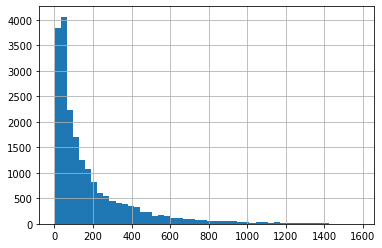

In [18]:
data['days_exposition'].hist(bins=50) #на гистограмме видно, что количество публикации больще 1500дней можно отсеить.
data = data.query('(days_exposition < 1500)|(days_exposition.isna())')
data.describe()

<div class="alert alert-info">
<b></b> 
</div>

<div class="alert alert-info">
<b> Да, так как у нас нет данных о районах, высоту потолков лучше не трогать, что бы не искажать данные</b> 

<b> Так же данные о количестве этажей в доме и жилой площади</b> - Исправил, убрал пропуска floors total
</div>

<div class="alert alert-info">
<b> сделано </b> 
</div>

In [19]:
# check
data['locality_name'].nunique()

310

In [20]:
# check
data.value_counts('locality_name').head(11)

locality_name
Санкт-Петербург    15239
Мурино               589
Кудрово              471
Шушары               439
Всеволожск           395
Пушкин               357
Колпино              337
Парголово            326
Гатчина              306
Выборг               233
Петергоф             200
dtype: int64

In [21]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23166 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23166 non-null  int64         
 1   last_price            23166 non-null  float64       
 2   total_area            23166 non-null  float64       
 3   first_day_exposition  23166 non-null  datetime64[ns]
 4   rooms                 23166 non-null  int64         
 5   ceiling_height        14130 non-null  float64       
 6   floors_total          23166 non-null  int64         
 7   living_area           21318 non-null  float64       
 8   floor                 23166 non-null  int64         
 9   is_apartment          23166 non-null  int64         
 10  studio                23166 non-null  bool          
 11  open_plan             23166 non-null  bool          
 12  kitchen_area          20939 non-null  float64       
 13  balcony         

## Добавление новых столбцов

In [25]:
data['price_one_meter'] = data['last_price']/data['living_area']

def type_floor(data):
    try:
        if data['floor'] == 1:
            return 'первый'
        elif data['floor'] == data['floors_total']:
            return 'последний'
        elif data['floor'] == 0 :
            return 'цокольный'
        elif data['floor'] < 0:
            return 'подвальный'
        else:
            return 'другой'
    except:
        'нет данных'
data['type_floor'] = data.apply(type_floor, axis=1)
data['center_nearest_km'] = data['cityCenters_nearest']/1000
data['center_nearest_km'] = data['center_nearest_km'].round()
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

data.info()
data.describe()
data['center_nearest_km'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23166 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23166 non-null  int64         
 1   last_price            23166 non-null  float64       
 2   total_area            23166 non-null  float64       
 3   first_day_exposition  23166 non-null  datetime64[ns]
 4   rooms                 23166 non-null  int64         
 5   ceiling_height        14130 non-null  float64       
 6   floors_total          23166 non-null  int64         
 7   living_area           21318 non-null  float64       
 8   floor                 23166 non-null  int64         
 9   is_apartment          23166 non-null  int64         
 10  studio                23166 non-null  bool          
 11  open_plan             23166 non-null  bool          
 12  kitchen_area          20939 non-null  float64       
 13  balcony         

12.0    1599
15.0    1548
13.0    1451
14.0    1269
16.0    1258
        ... 
57.0       1
63.0       1
61.0       1
45.0       1
62.0       1
Name: center_nearest_km, Length: 61, dtype: int64

<AxesSubplot:>

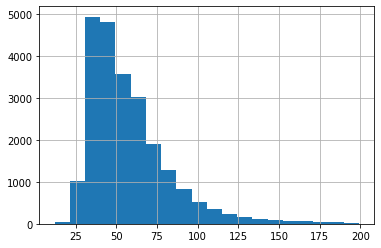

In [26]:
data[data['total_area'] < 200]['total_area'].hist(bins=20) # на гистограмее отмечается нормальное распределение, на пике квартиры с площадью 30-50 кв.м., во что легко верится


<AxesSubplot:>

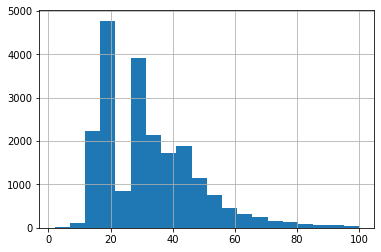

In [27]:
data[data['living_area']<100]['living_area'].hist(bins=20) # на гистограмее отмечается нормальное распределение, на пике квартиры с жилой площадью 15-35 кв.м.


<AxesSubplot:>

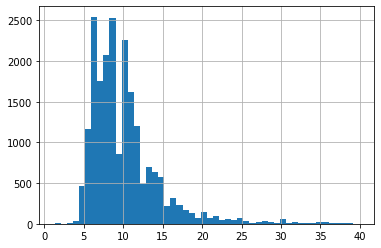

In [28]:
data['kitchen_area'].hist(bins=50) # на гистограмее отмечается нормальное распределение, на пике квартиры с площадью 10 кв.м.


<AxesSubplot:>

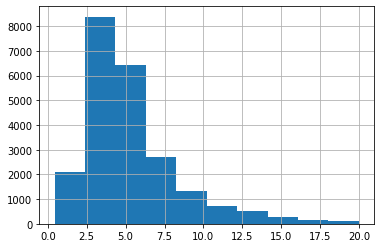

In [29]:
data['price_in_mln'] = data['last_price']/1000000# для наглядности переведем в млн. в новом столбце
data[data['price_in_mln'] < 20]['price_in_mln'].hist(bins= 10) # на гистограмее отмечается нормальное распределение, на пике квартиры с ценой от 2.5 до 6 млн.р.


<AxesSubplot:>

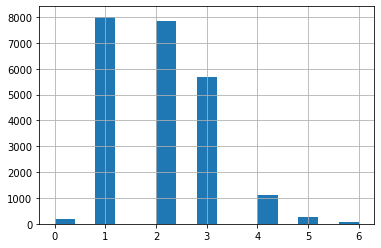

In [30]:
data['rooms'].hist(bins=15) # на гистограмее отмечается нормальное распределение, на пике квартиры с 1 и 2 комнатами


<AxesSubplot:>

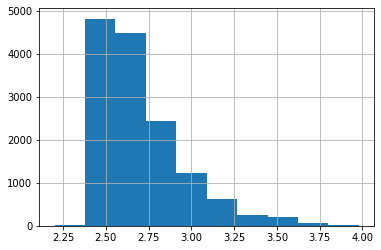

In [31]:
data[data['ceiling_height']<5]['ceiling_height'].hist(bins=10) # на гистограмее отмечается нормальное распределение, на пике квартиры со стандартной высотой потолка


<AxesSubplot:>

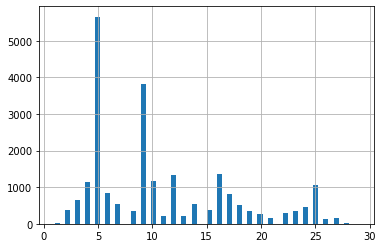

In [32]:
data['floors_total'].hist(bins=60) # на гистограмее отмечается нормальное распределение, на пике пятиэтажные дома


<AxesSubplot:>

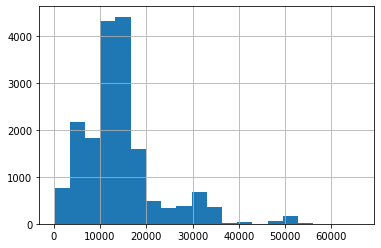

In [33]:
data['cityCenters_nearest'].hist(bins=20) # большинство квартир находятся в 10-15км от центра города


<AxesSubplot:>

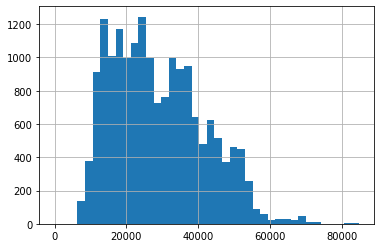

In [34]:
data['airports_nearest'].hist(bins=40) # большинство квартир находятся в 10-30км от аэропорта


<AxesSubplot:>

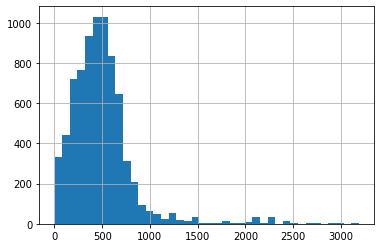

In [35]:
data['parks_nearest'].hist(bins=40) # большинство квартир имеют в пределах 800м парк


<AxesSubplot:>

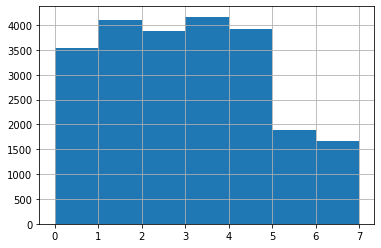

In [36]:
data['weekday_exposition'].hist(bins=7, range=(0,7)) # в будние дни публикуют в 2 раза активнее чем в выходные


<AxesSubplot:>

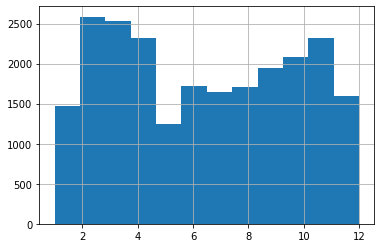

In [37]:

data['month_exposition'].hist(bins=12) # Весной и осенью публикуют чаще




-на гистограмме отмечается нормальное распределение, на пике квартиры с площадью 30-50 кв.м., во что легко верится
-на гистограмме отмечается нормальное распределение, на пике квартиры с жилой площадью 15-35 кв.м.
-на гистограмме отмечается нормальное распределение, на пике квартиры с площадью 10 кв.м.
-для наглядности переведем в млн. в новом столбце
-на гистограмме отмечается нормальное распределение, на пике квартиры с ценой от 2.5 до 6 млн.р.
-на гистограмме отмечается нормальное распределение, на пике квартиры с 1 и 2 комнатами
-на гистограмме отмечается нормальное распределение, на пике квартиры со стандартной высотой потолка
-на гистограмме отмечается нормальное распределение, на пике пятиэтажные дома
-большинство квартир находятся в 10-15км от центра города
-большинство квартир находятся в 10-30км от аэропорта
-большинство квартир имеют в пределах 800м парк
-в будние дни публикуют в 2 раза активнее чем в выходные
-весной и осенью публикуют чаще

## Определение зависимости стоимости квартиры от имеющихся в таблице величин

count    20123.000000
mean       178.567112
std        216.639042
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1497.000000
Name: days_exposition, dtype: float64

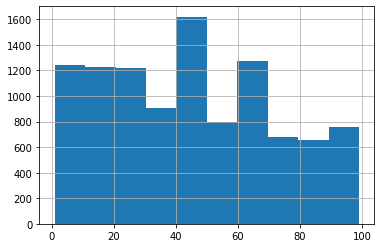

In [38]:
#data['days_exposition'].hist(bins=100)# - строим гистограмму по дню публикации
data.query('days_exposition<100')['days_exposition'].hist(bins=10)
display(data['days_exposition'].describe()) # оцениваем показатели

0.7634673871126997


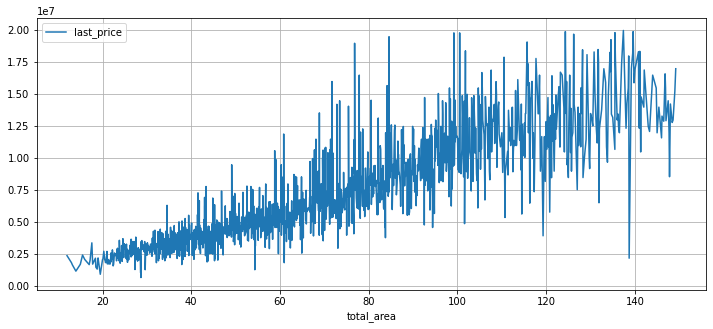

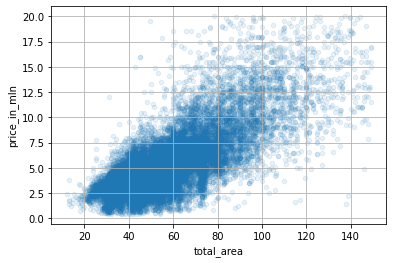

In [39]:
(
    data.query('(total_area<150)&(price_in_mln<20)')
    .pivot_table(index='total_area', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) #построим график по сгруппированным по столбцам total_area и price_in_mln данным в срезе,
#где цена меньше 15млн. и прощадь меньше 300кв.м. - для нагрядности.
(
    data
    .query('(total_area<150)&(price_in_mln<20)').
    plot(x='total_area', y='price_in_mln', kind='scatter', grid=True, alpha = 0.1)
)     # построим диаграмму рассеивания
print(data['last_price'].corr(data['total_area'])) # рассчитаем коэффициет корреляции


-в среднем квартиры продаются за 95 дней(медианное значение).
-продажу можно считать быстрой, в случае срока продажи до 45 дней (до 1 квартиля).
-продажу можно считать долгой, в случае срока продажи больше 232 дней (больше 3 квартиля).
-отмечаются пики на 40 и 60 днях.

-отмечается положительная корреляция цены и площади квартиры - 0.65. 
-наибольшее количество продаваемых квартир находятся в ценовом промежутке от 2.5 до 5млн. с площадью от 25 до 45кв.м.


# example 1

#### example 2

0.6583656666765982


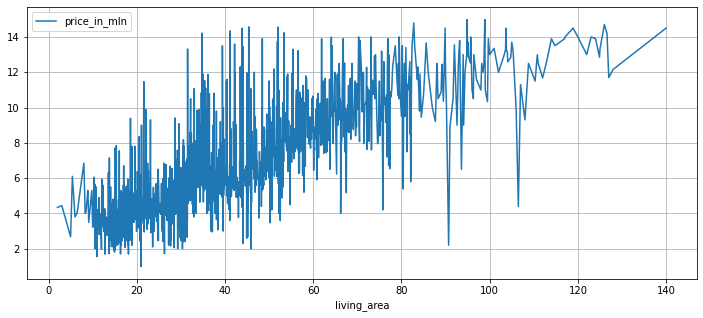

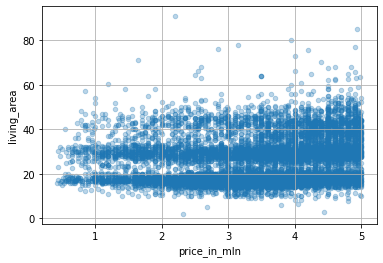

In [40]:
(
    data.query('(living_area<300)&(price_in_mln<15)')
    .pivot_table(index='living_area', values='price_in_mln', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) #построим график по сгруппированным по столбцам living_area и price_in_mln данным в срезе, где цена меньше 15млн. и жилая прощадь меньше 300кв.м. - для нагрядности.
data.query('(living_area<100)&(price_in_mln<5)').plot(x='price_in_mln', y='living_area', kind='scatter', grid=True, alpha=0.3) # построим диаграмму рассеивания
print(data['last_price'].corr(data['living_area'])) # рассчитаем коэффициет корреляции

-отмечается положительная корреляция цены и жилой площади квартиры - 0.59. 
-наибольшее количество продаваемых квартир находятся в ценовом промежутке от 2.5 до 5млн. с жилой площадью 20кв.м.


0.566298908058789


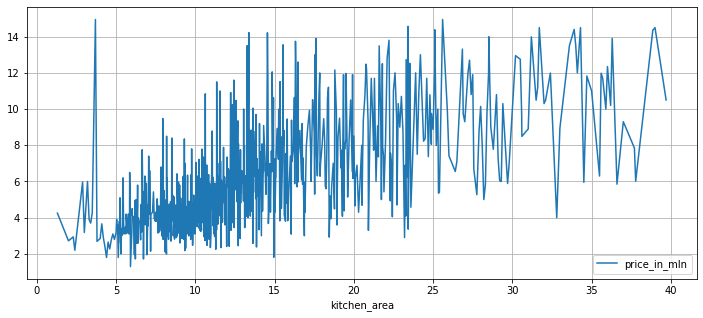

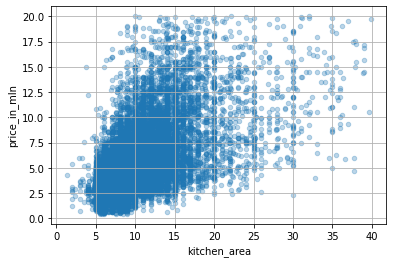

In [41]:
(
    data.query('(kitchen_area<50)&(price_in_mln<15)')
    .pivot_table(index='kitchen_area', values='price_in_mln', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) #построим график по сгруппированным по столбцам kitchen_area и price_in_mln данным в срезе, где цена меньше 20млн. и прощадь кухни меньше 50кв.м. - для нагрядности.
# построим диаграмму рассеивания
data.query('(kitchen_area<50)&(price_in_mln<20)').plot(x='kitchen_area', y='price_in_mln', kind='scatter', grid=True, alpha=0.3)
print(data['last_price'].corr(data['kitchen_area'])) # рассчитаем коэффициет корреляции

-отмечается положительная корреляция цены и площади кухни - 0.51. 
-наибольшее количество продаваемых квартир находятся в ценовом промежутке от 3 до 5млн. с кухней от 5 до 12кв.м.

0.4688399701359465


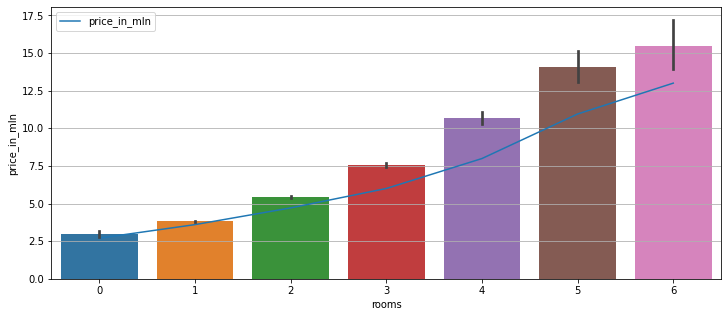

In [42]:
(
    data.query('price_in_mln<20')
    .pivot_table(index='rooms', values='price_in_mln', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) #построим график по сгруппированным по столбцам rooms и price_in_mln данным в срезе, где цена меньше 15млн.- для нагрядности.
sns.barplot(data=data, x='rooms', y='price_in_mln')
# построим график
print(data['rooms'].corr(data['last_price'])) # рассчитаем коэффициет корреляции

-отмечается положительная корреляция цены и количества комнат в квартире - 0.46
-на графике - явный рост цены за квартиру при увеличении кол-ва комнат в ней.

0.07146253477512243


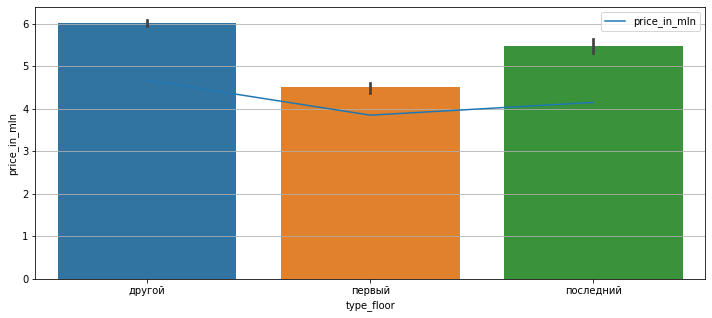

In [43]:
(
    data.query('price_in_mln<15')
    .pivot_table(index='type_floor', values='price_in_mln', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) #построим график по сгруппированным по столбцам floor и price_in_mln данным в срезе, где цена меньше 15млн. . - для нагрядности.
sns.barplot(data=data, x='type_floor', y='price_in_mln') # построим график
print(data['last_price'].corr(data['floor'])) # рассчитаем коэффициет корреляции

-Опеределяется зависимость_самая низкая средняя цена у квартир на 1 этаже, среднем на 500тыс. выше у квартир на последнем этаже.
-корреляции цены и этажом нет - 0.04
-наибольшая кол-во продаваемых квартир  на 3-4 этажах.

<AxesSubplot:xlabel='year_exposition', ylabel='price_in_mln'>

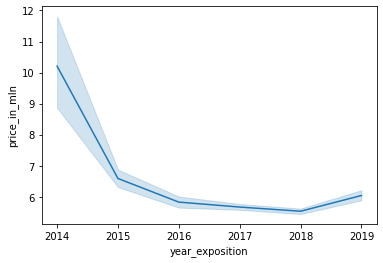

In [44]:
sns.lineplot(data=data, x='year_exposition', y='price_in_mln')
#построим график по сгруппированным по столбцам year_exposition и price_in_mln данным в срезе, где цена меньше 15млн. - для нагрядности.

<AxesSubplot:xlabel='month_exposition', ylabel='price_in_mln'>

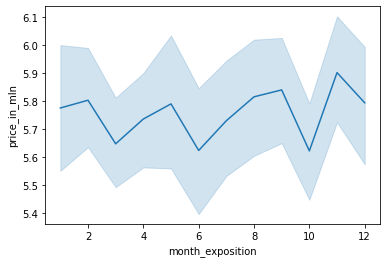

In [45]:
display(sns.lineplot(data=data, x='month_exposition', y='price_in_mln'))
#построим график по сгруппированным по столбцам month_exposition и price_in_mln данным в срезе, где цена меньше 15млн. - для нагрядности.


<AxesSubplot:xlabel='weekday_exposition', ylabel='price_in_mln'>

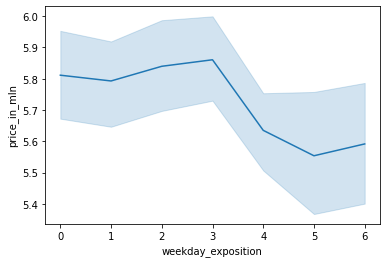

In [46]:
display(sns.lineplot(data=data, x='weekday_exposition', y='price_in_mln'))
#построим график по сгруппированным по столбцам day_exposition и price_in_mln данным в срезе, где цена меньше 15млн. - для нагрядности.



-отмечается падение средней цены на квартиры с 2014г. по 2016г. на 1.6млн.руб., вероятно, искусственный, далее рост с 2017г. по 2019г. на 500тыс. руб.
-относительно месяца публикации изменение средней цены за квартиру в диапазоне 300тыс. с 4мя пиками в 2,5,9,11 месяцах.
-относительно дня публикации изменение средней цены за квартиру в диапазоне 200тыс.р. 
-выраженной динамики изменения цен относительно дня недели, месяца публикации не отмечается

### Определение наиболее дорогих районов, рассчет средней стоимости квадратного метра.

In [47]:
# check
display(data.value_counts('locality_name').head(11))

locality_name
Санкт-Петербург    15239
Мурино               589
Кудрово              471
Шушары               439
Всеволожск           395
Пушкин               357
Колпино              337
Парголово            326
Гатчина              306
Выборг               233
Петергоф             200
dtype: int64

In [48]:
(
    data
    .groupby('locality_name')['price_one_meter']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).style.format("{:,.0f}")

,mean,count
locality_name,,
Санкт-Петербург,"206,911","14,146"
Парголово,"200,718",301
Кудрово,"196,134",423
Пушкин,"189,727",333
Мурино,"177,248",523
Шушары,"155,485",403
Петергоф,"147,725",196
Всеволожск,"133,447",369
Колпино,"131,722",327


<div class="alert alert-info">
<b>
-самый дешевый средний квадратный метр в Выборге
-самый дорогой средний квадратный метр в Санкт-Петербурге</b> 
</div>

In [49]:
# check TOP-10
# способы группировки и сортировки информации

(
    data
    .groupby('locality_name')['price_one_meter']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).style.format("{:,.0f}")

# .plot(y = 'mean', kind = 'bar')

,mean,count
locality_name,,
Санкт-Петербург,"206,911","14,146"
Парголово,"200,718",301
Кудрово,"196,134",423
Пушкин,"189,727",333
Мурино,"177,248",523
Шушары,"155,485",403
Петергоф,"147,725",196
Всеволожск,"133,447",369
Колпино,"131,722",327


,price_in_mln
center_nearest_km,
0.0,12.245000
1.0,9.970000
2.0,9.300000
3.0,8.260000
4.0,8.822000
5.0,8.920262
6.0,8.235000
7.0,7.200000
8.0,7.225000


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,type_floor,center_nearest_km,weekday_exposition,month_exposition,year_exposition,price_in_mln
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,0,...,0.0,NaN,128.0,478333.333333,другой,27.0,1,11,2017,14.35
5961,6,2250000.0,32.0,2018-02-27,1,NaN,2,16.5,2,0,...,0.0,NaN,178.0,136363.636364,последний,27.0,1,2,2018,2.25


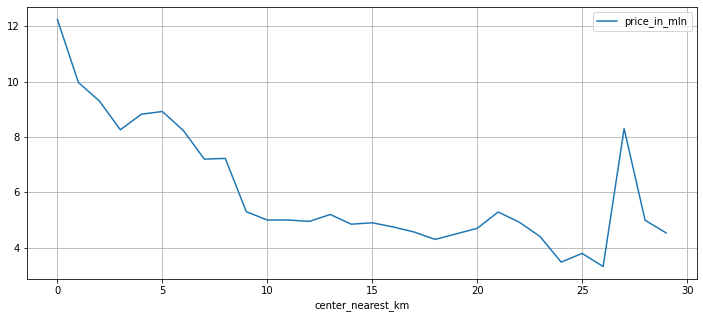

In [50]:
display(
    data[data['locality_name'] == "Санкт-Петербург"]
    .pivot_table(index='center_nearest_km', values='price_in_mln', aggfunc='median')
)
(
    data[data['locality_name'] == "Санкт-Петербург"]
    .pivot_table(index='center_nearest_km', values='price_in_mln', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
)

display(data[(data['locality_name'] == "Санкт-Петербург")&(data['center_nearest_km']==27)])


<div class="alert alert-info">
    
<b> в сводной таблице выведена цена каждого киллометра от центра </b> 
    
<b> на графике на 27км. отмечается пик- на фоне аномально дорогой квартиры (двушка 74 кв.м. за 14млн), искажающей среднее значение цены.   </b> 
</div>

### Общий вывод

- Самые востребованные однокомантные и двухкомнатные квартиры с площадью 30-50 кв.м., жилой площадью 15-35 кв.м.,площадью кухни 10-12 кв.м., с ценой от 2.5 до 6 млн.р..
- Большинство квартир находятся в 10-15км от центра города, 10-30км от аэропорта, имеют в пределах 800м парк.
- Будние дни публикуют в 2 раза активнее чем в выходные.
- Самый дешевый средний квадратный метр в Выборге -самый дорогой средний квадратный метр в Санкт-Петербурге.
- Цена квартиры больше всего зависит от площади квартиры, количества комнат, расстояния до центра города. 

- Для более детального анализа хотель бы получить доролнительню информацию: ближайшая станция метро, расстояние до нее. Категория дома ( исторический, хрущека или новостройка). Наличие лифта
